<h1>Random Imputation</h1>

* Univariate

**How It Works**
* Identify the missing values in a column.
* Randomly select values from the non-missing entries of the same column.
* Replace the missing values with the randomly chosen values.

**Can be applied to both Numerical and Categorical Columns**

* The Distribution and variance of data remains almost the same

❌ Can introduce bias if missing values have a pattern.

❌ Reduces variability in the data.

❌ Not ideal for large amounts of missing data.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Applying On Numerical Data

In [105]:
df = pd.read_csv('/content/train.csv', usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [106]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [107]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [108]:
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [109]:
X_train.head()

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [110]:
# Select all rows where Age_imputed value is null
# Drop all the null values from X_train['Age'] and
# take sample of n number of values where n = Null in X_train['Age']

# X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [111]:
# For training data
num_missing_train = X_train['Age_Imputed'].isnull().sum()
X_train.loc[X_train['Age_Imputed'].isnull(), 'Age_Imputed'] = (
    X_train['Age'].dropna()
    .sample(num_missing_train, replace=True, random_state=42)
    .values
)

# For test data
num_missing_test = X_test['Age_Imputed'].isnull().sum()
X_test.loc[X_test['Age_Imputed'].isnull(), 'Age_Imputed'] = (
    X_train['Age'].dropna()
    .sample(num_missing_test, replace=True, random_state=42)
    .values
)

In [112]:
X_train

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,54.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


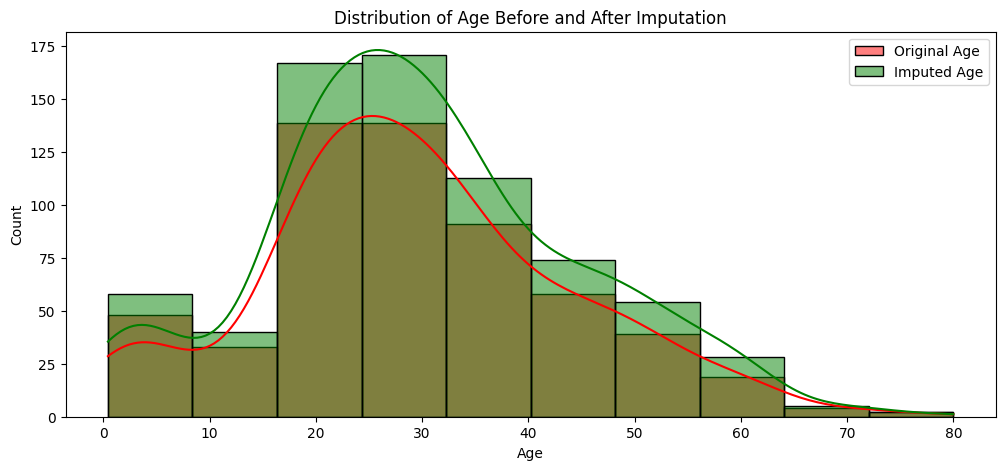

In [113]:
plt.figure(figsize=(12,5))

sns.histplot(X_train['Age'], bins=10, kde=True, label='Original Age', color='red')
sns.histplot(X_train['Age_Imputed'], bins=10, kde=True, label='Imputed Age', color='green', alpha=0.5)

plt.legend()
plt.title('Distribution of Age Before and After Imputation')

plt.show()

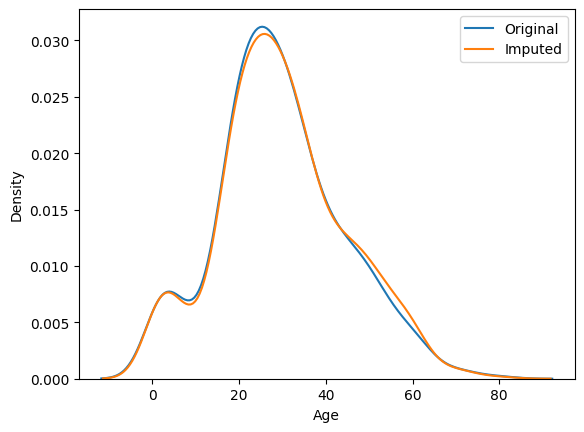

In [114]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_Imputed'],label = 'Imputed')

plt.legend()
plt.show()

<Axes: >

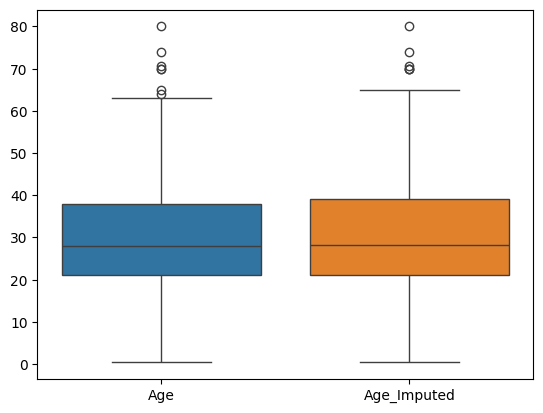

In [115]:
sns.boxplot(data=X_train[['Age', 'Age_Imputed']])

In [116]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_Imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  215.51367932410395


In [117]:
X_train[['Fare', 'Age', 'Age_Imputed']].cov()

,Fare,Age,Age_Imputed
Fare,2700.831981,71.580633,60.692205
Age,71.580633,210.251707,210.251707
Age_Imputed,60.692205,210.251707,215.513679


# Applying on Categorical Data

In [118]:
df2 = pd.read_csv('/content/housing.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
df2.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [119]:
df2.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [120]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                                    #df2.drop(columns=['SalePrice']),
                                                    df2,
                                                    df2['SalePrice'], test_size=0.2, random_state=42)
X_train2.shape, X_test2.shape

((1168, 3), (292, 3))

In [121]:
X_train2['GarageQual_Imputed'] = X_train2['GarageQual']
X_test2['GarageQual_Imputed'] = X_test2['GarageQual']

X_train2['FireplaceQu_Imputed'] = X_train2['FireplaceQu']
X_test2['FireplaceQu_Imputed'] = X_test2['FireplaceQu']

In [122]:
X_train.head()

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [123]:
# For training data GarageQual_Imputed
cat_missing_train = X_train2['GarageQual_Imputed'].isnull().sum()
X_train2.loc[X_train2['GarageQual_Imputed'].isnull(), 'GarageQual_Imputed'] = (
    X_train2['GarageQual'].dropna()
    .sample(cat_missing_train, replace=True, random_state=42)
    .values
)

# For test data GarageQual_Imputed
cat_missing_test = X_test2['GarageQual_Imputed'].isnull().sum()
X_test2.loc[X_test2['GarageQual_Imputed'].isnull(), 'GarageQual_Imputed'] = (
    X_train2['GarageQual'].dropna()
    .sample(cat_missing_test, replace=True, random_state=42)
    .values
)

# For training data FireplaceQu_Imputed
cat_missing_train = X_train2['FireplaceQu_Imputed'].isnull().sum()
X_train2.loc[X_train2['FireplaceQu_Imputed'].isnull(), 'FireplaceQu_Imputed'] = (
    X_train2['FireplaceQu'].dropna()
    .sample(cat_missing_train, replace=True, random_state=42)
    .values
)

# For test data
cat_missing_test = X_test2['FireplaceQu_Imputed'].isnull().sum()
X_test2.loc[X_test2['FireplaceQu_Imputed'].isnull(), 'FireplaceQu_Imputed'] = (
    X_train2['FireplaceQu'].dropna()
    .sample(cat_missing_test, replace=True, random_state=42)
    .values
)


In [124]:
X_train2.head(7)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_Imputed
254,NaN,TA,145000,TA,Gd
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,TA,Gd
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd
303,NaN,TA,149900,TA,TA
86,Gd,TA,174000,TA,Gd


In [125]:
temp = pd.concat([
    X_train2['GarageQual'].value_counts() / len(X_train2['GarageQual'].dropna()),
    X_train2['GarageQual_Imputed'].value_counts() / len(X_train2)
], axis=1)

temp.columns = ['Original', 'Imputed']

In [126]:
temp

,Original,Imputed
TA,0.951087,0.952055
Fa,0.032609,0.032534
Gd,0.011775,0.011130
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [127]:
temp2 = pd.concat([
    X_train2['FireplaceQu'].value_counts() / len(X_train2['FireplaceQu'].dropna()),
    X_train2['FireplaceQu_Imputed'].value_counts() / len(X_train2)
], axis=1)

temp2.columns = ['Original', 'Imputed']

In [128]:
temp2

,Original,Imputed
Gd,0.491143,0.484589
TA,0.405797,0.412671
Fa,0.043478,0.040240
Ex,0.033816,0.041096
Po,0.025765,0.021404
